In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00
...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,charlie,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,charlie,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,charlie,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,charlie,602.00


In [3]:
print("Dataset Shape:", df.shape)
print("\
Column Names and Types:")
print(df.dtypes)
print("\
First few rows:")
df.head()

Dataset Shape: (7307, 9)
Column Names and Types:
ID               object
Temperature     float64
Humidity        float64
MQ7_analog      float64
MQ9_analog      float64
MG811_analog    float64
MQ135_analog    float64
device_name      object
CO2             float64
dtype: object
First few rows:


,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00


In [4]:
# Deep statistical overview and missing data analysis
print("=== COMPREHENSIVE DATA OVERVIEW ===")
print(f"Dataset contains {df.shape[0]} observations with {df.shape[1]} features")
print(f"Target variable: CO2 (continuous regression problem)")

=== COMPREHENSIVE DATA OVERVIEW ===
Dataset contains 7307 observations with 9 features
Target variable: CO2 (continuous regression problem)


In [5]:
print("\
=== MISSING DATA ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_df)

=== MISSING DATA ANALYSIS ===
              Missing_Count  Missing_Percentage
ID                        0                 0.0
Temperature               0                 0.0
Humidity                  0                 0.0
MQ7_analog                0                 0.0
MQ9_analog                0                 0.0
MG811_analog              0                 0.0
MQ135_analog              0                 0.0
device_name               0                 0.0
CO2                       0                 0.0


In [10]:
df.duplicated().sum()

0

The dataset does not contain any duplicates and missing value

In [14]:
print("=== STATISTICAL SUMMARY ===")
df.describe()


=== STATISTICAL SUMMARY ===


,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2
count,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000
mean,29.681726,69.593742,4230.820902,3976.708841,3995.126568,3444.788240,611.634608
std,2.016785,7.248136,1085.008100,1603.972744,1098.740604,893.426679,16.540953
min,23.440000,52.200000,2380.000000,1098.500000,1353.500000,1186.500000,573.166667
25%,28.490000,65.665000,3362.500000,2832.500000,3181.000000,2912.500000,600.000000
50%,29.290000,70.555000,4061.000000,4073.000000,4137.000000,3586.500000,608.000000
75%,31.717500,74.350000,4780.750000,5286.166667,4731.000000,4143.750000,621.000000
max,33.850000,93.525000,9545.500000,10379.500000,7919.000000,6257.000000,677.000000


The average temperature is around 29.7°C, typical for a tropical region like Nigeria. The standard deviation (2°C) suggests moderate variability. The range (23.44°C to 33.85°C) indicates a warm climate with some daily or seasonal fluctuations. The interquartile range (IQR, 28.49°C to 31.72°C) shows that 50% of the data lies within a narrow band, with outliers possible above 31.72°C.

MQ7_analog: This sensor (sensitive to CO) shows a wide range (2380 to 10379.5), with a mean of 4230.8 and a high standard deviation (1085), indicating significant variability. The IQR (3362.5 to 5286.2) suggests that 50% of readings are moderately consistent, but the max value (10379.5) is a clear outlier, possibly due to noise or cross-sensitivity to other gases.

MQ9_analog: Similar to MQ7_analog, MQ9_analog (sensitive to CO and CH₄) has a mean of 3976.7 and a standard deviation of 1098.7, with a range from 1098.5 to 7919. The IQR (3181 to 4731) indicates moderate consistency, but the lower min value suggests some readings may be unreliable or indicative of low gas concentrations.

MG811_analog: Designed for CO₂ detection, MG811_analog has a mean of 3995.1 and a standard deviation of 893.4. The range (1353.5 to 6257) is wide, with the IQR (3181 to 4713.75) showing moderate spread. The lower min value might indicate calibration issues or low CO₂ environments, while the max (6257) could reflect high CO₂ zones or sensor saturation.

MQ135_analog (detects CO₂, NH₃, NOx) has a mean of 3444.8 and a standard deviation of 915.4. The range (1186.5 to 6777) is broad, with an IQR (2912.5 to 4143.75). The low min value suggests potential sensor underperformance, while the max (6777) might indicate high pollution levels or cross-sensitivity.


The target variable, CO2, has a mean of 611.6 ppm and a standard deviation of 16.5 ppm, indicating relatively low variability compared to sensor readings. The range (573.17 to 677 ppm) is consistent with indoor/outdoor CO₂ levels, with an IQR (600 to 621 ppm). The max value (677 ppm) is a potential outlier, possibly due to specific environmental conditions or measurement errors.

In [12]:

print("\
=== UNIQUE VALUES ANALYSIS ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count < 20:  # Show unique values for categorical-like columns
        print(f"  Values: {sorted(df[col].unique())}")
    print()

=== UNIQUE VALUES ANALYSIS ===
ID: 7307 unique values

Temperature: 1728 unique values

Humidity: 3860 unique values

MQ7_analog: 4211 unique values

MQ9_analog: 4392 unique values

MG811_analog: 4006 unique values

MQ135_analog: 3617 unique values

device_name: 3 unique values
  Values: ['alpha', 'beta', 'charlie']

CO2: 310 unique values



CO2: 310 unique values

The device_name column has only 3 unique values: 'alpha', 'beta', and 'charlie', suggesting it’s categorical.
The ID column is unique for each row and can be ignored for modeling.
The target (CO2) has 310 unique values, indicating a good spread for regression.
Next, I’ll visualize distributions, check for outliers, and analyze relationships between features and the target.

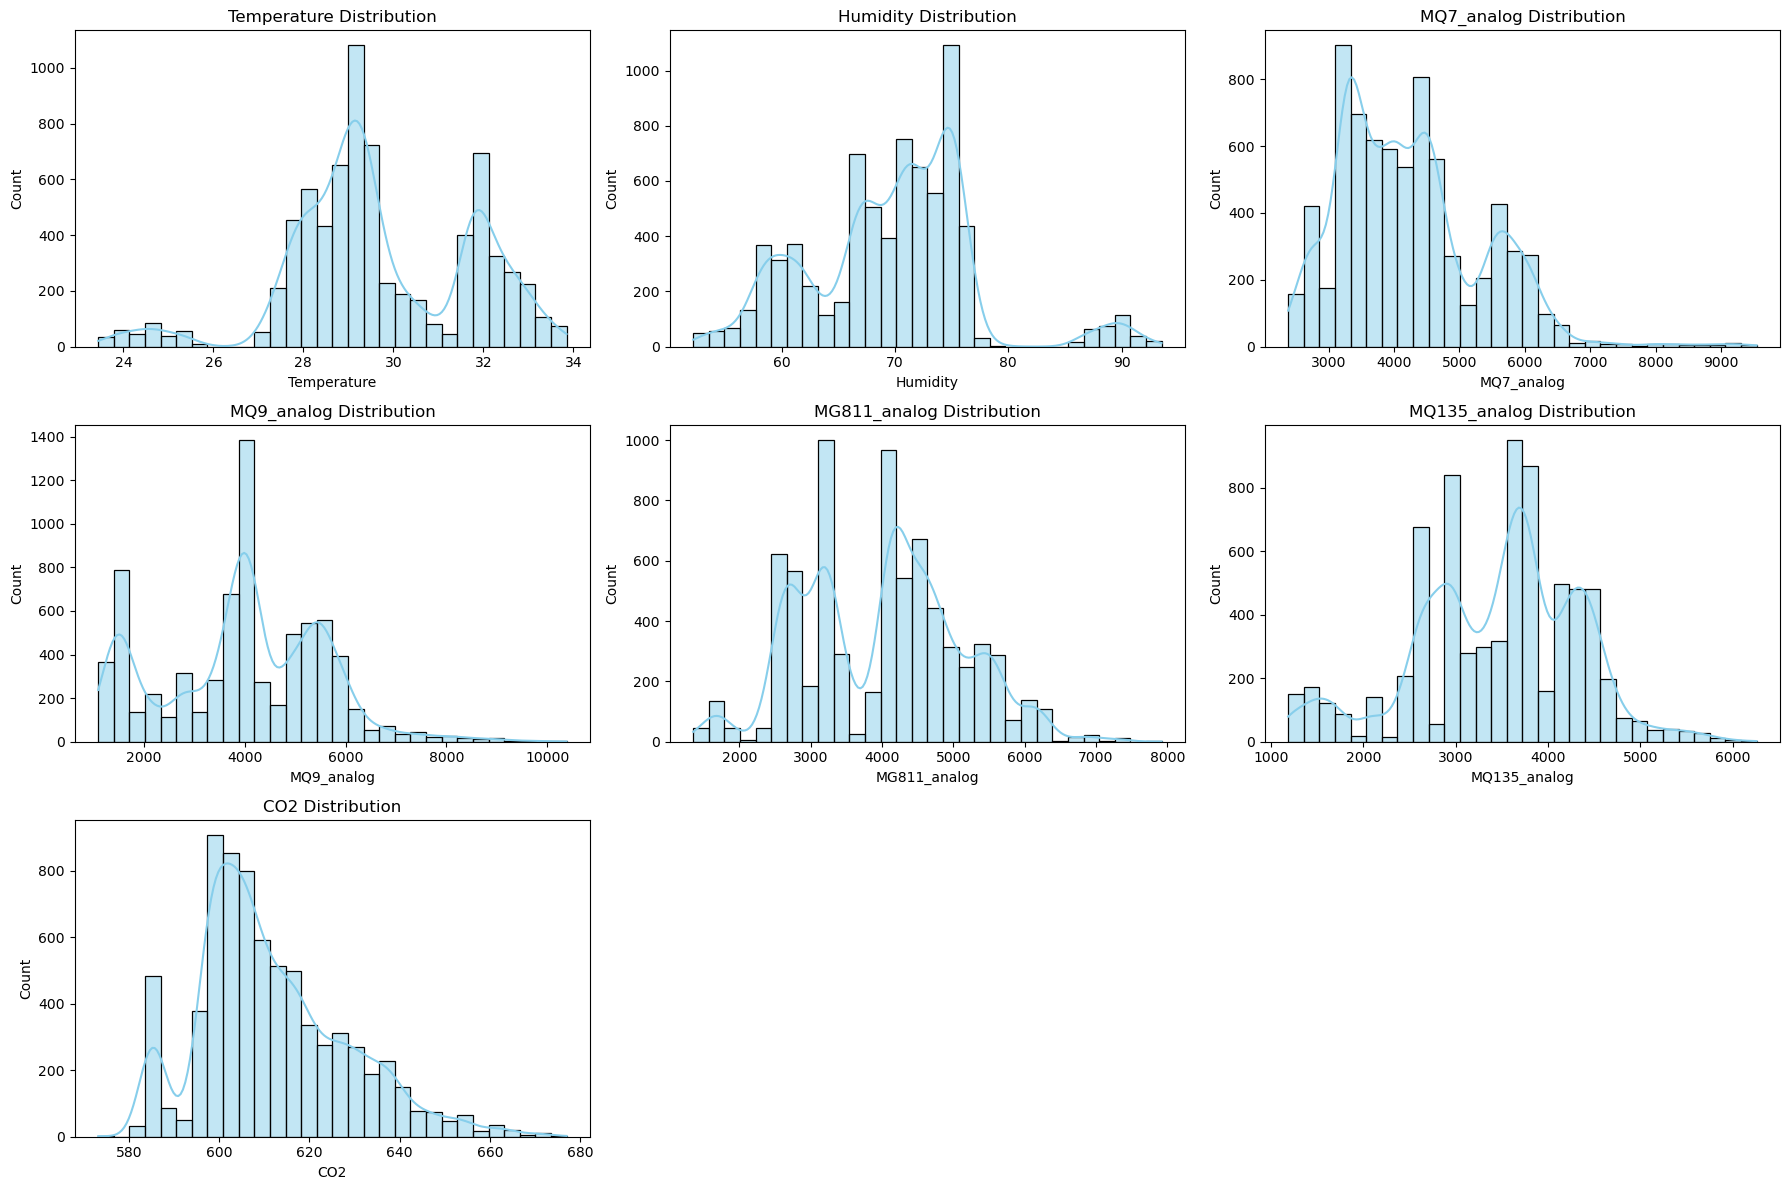

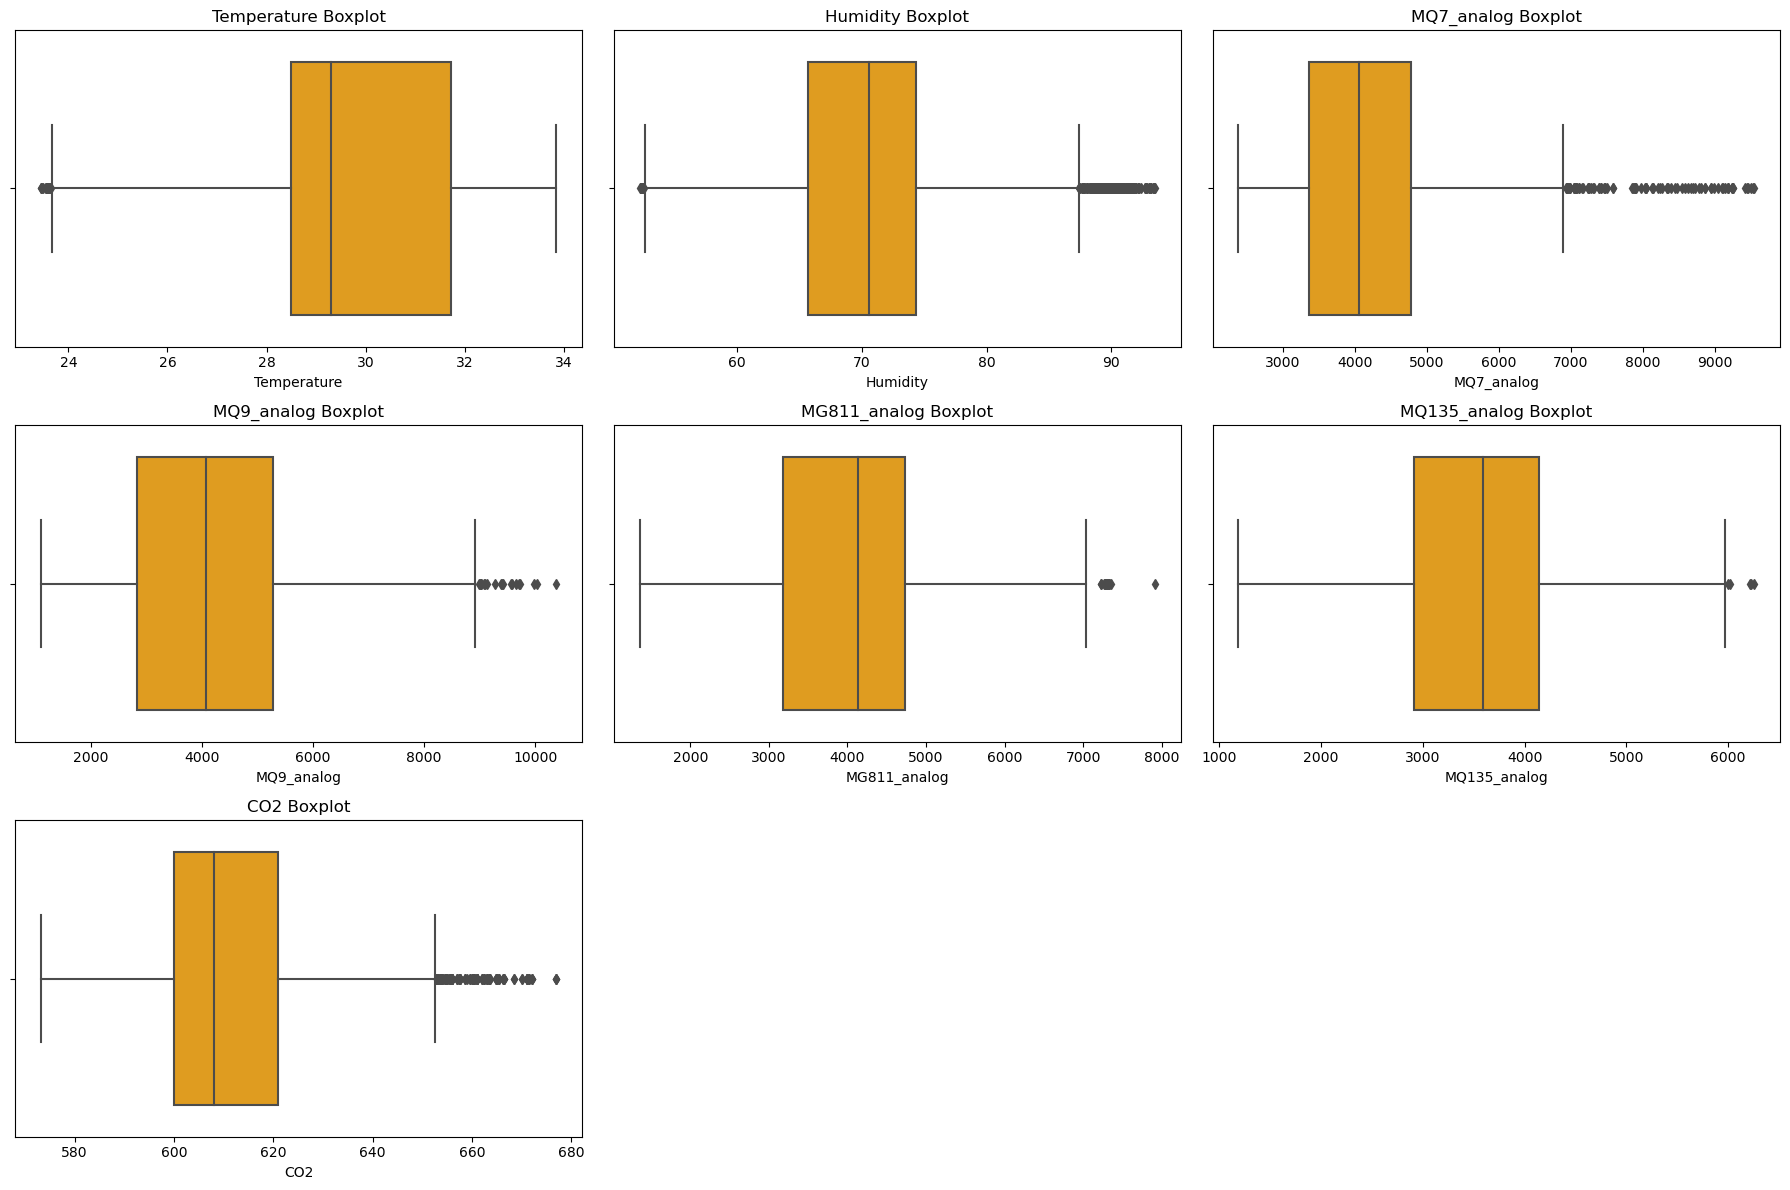

In [7]:
# Visualize distributions and outliers for all numeric features
num_cols = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog', 'CO2']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col + ' Distribution')
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(col + ' Boxplot')
plt.tight_layout()
plt.show()

The first set of charts shows the distribution (histograms with KDE) for each numeric variable:

Temperature and Humidity are fairly normally distributed, though Humidity is slightly right-skewed.
The sensor readings (MQ7_analog, MQ9_analog, MG811_analog, MQ135_analog) show multi-modal or skewed distributions, suggesting different operating regimes or environmental conditions.
The CO2 target variable is right-skewed, with a long tail of higher values.

The second set of charts are boxplots for each feature:

There are clear outliers in all sensor readings and the CO2 target, especially in the upper range.
Outliers are expected in environmental sensor data, but their impact should be considered during modeling (e.g., robust scaling or outlier removal).


In [8]:
# Advanced correlation analysis and feature relationships
print("=== CORRELATION MATRIX ANALYSIS ===")
correlation_matrix = df[num_cols].corr()
print("Correlation with CO2 target:")
co2_correlations = correlation_matrix['CO2'].sort_values(ascending=False)
print(co2_correlations)



=== CORRELATION MATRIX ANALYSIS ===
Correlation with CO2 target:
CO2             1.000000
MG811_analog    0.101462
MQ7_analog      0.093732
MQ135_analog    0.027344
MQ9_analog     -0.026366
Humidity       -0.032440
Temperature    -0.050370
Name: CO2, dtype: float64


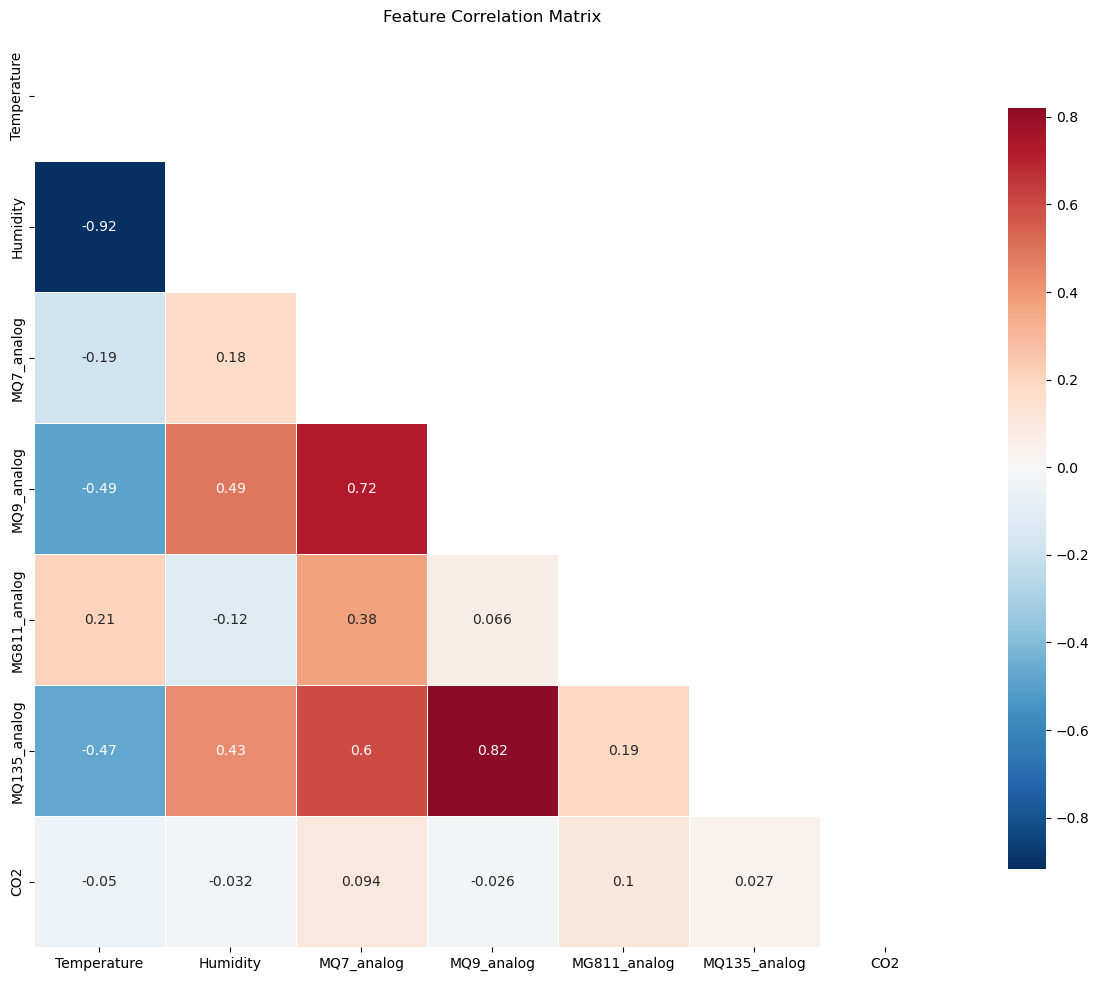

=== CORRELATION SIGNIFICANCE TESTS ===
Temperature:
  Pearson: r=-0.0504, p=1.65e-05
  Spearman: ρ=-0.1433, p=7.90e-35

Humidity:
  Pearson: r=-0.0324, p=5.55e-03
  Spearman: ρ=0.0452, p=1.10e-04

MQ7_analog:
  Pearson: r=0.0937, p=9.86e-16
  Spearman: ρ=0.0845, p=4.69e-13

MQ9_analog:
  Pearson: r=-0.0264, p=2.42e-02
  Spearman: ρ=-0.0351, p=2.68e-03

MG811_analog:
  Pearson: r=0.1015, p=3.50e-18
  Spearman: ρ=0.0807, p=4.91e-12

MQ135_analog:
  Pearson: r=0.0273, p=1.94e-02
  Spearman: ρ=0.0505, p=1.59e-05



In [9]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Statistical significance of correlations with CO2
print("\
=== CORRELATION SIGNIFICANCE TESTS ===")
for col in num_cols[:-1]:  # Exclude CO2 itself
    corr_coef, p_value = pearsonr(df[col], df['CO2'])
    spearman_coef, spearman_p = spearmanr(df[col], df['CO2'])
    print(f"{col}:")
    print(f"  Pearson: r={corr_coef:.4f}, p={p_value:.2e}")
    print(f"  Spearman: ρ={spearman_coef:.4f}, p={spearman_p:.2e}")
    print()